# HW6: Neural Network (Due May 22)


#### Please restart the kernel and run all before you submit. 


#### Name:  Anshika Khandelwal


There are several goals of this HW:

1. You can implement fully connected neural network (FNN) and convolutional neural network (CNN) using Python.

2. We want to verify that CNN works better than FNN in image classification task.

3. We want to analyze how the neural network structure and batch_size affect the test accuracy. 

Remark: There are many factors affecting the test performance. Due to the computation limitation, I cannot analyze all of them. 

**You are allowed to use either Tensorflow or PyTorch. If you fail to install modules, feel free to use Google Colab.**

**Important remark: Your grader will not run your code this time since it is time consuming. Please restart the kernel and run all before you submit, and make sure that your plot is visible on Gradescope.**

## Import all required libraries

In [1]:
# import packages
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


## Load CIFAR10 Data

Load training and test samples from cifar10 dataset. Then normalize pixel values to be between 0 and 1 by dividing 255.0.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1.
train_images, test_images = train_images / 255.0, test_images / 255.0

## Data preparation for fully connected neural networks

Before we use convolutional neural network for image classification task, people used fully connected neural networks. In this section, we will prepare the data for FNN.

To implement FNN, we require a dataset which is a 2D numpy array where each row represents each sample and each column is a features. For image dataset, we will have 3D numpy array (grey images) or 4D numpy array (color images). Our goal is to reshaping 3D/4D numpy array to 2D numpy array such that each row is one image and columns are pixel values.

Simplification: For grey images, you can assume the shape is (m,d1,d2) where m is the number of images, d1 and d2 are the numbers of pixels on each side. For color images, you can assume the shape is (m,d1,d2,r) where m, d1, d2 have the same meaning as before and r is the number of color channels (usually r=3 or 4).

Please write a function to do this step. Your function should work for all image datasets (both grey and color images). Detailed docstring is required to explain your function. You must include the shape of your inputs and outputs when you write the docstring.

Some test codes are given to verify your codes.

**Later, you will use the function you write to generate inputs that is used to train your FNN models.**

In [3]:
def FNNprep(X):
    """
    Reshapes the input image data to a 2D numpy array such that each row is one image and columns are pixel values.
    
    Parameters:
    X (3D/4D numpy array): Input image data. Can be either grayscale images (3D array) or 
                       color images (4D array). The expected shapes are:
                       - (m, height, width) for grayscale images
                       - (m, height, width, channels) for color images
    
    Returns: reshaped 2D numpy array, where each row represents a flattened image.
    """
    
    # reshaping grey image 
    if len(X.shape) == 3:  
        m = X.shape[0]
        d1 = X.shape[1]
        d2 = X.shape[2]
        X_2d = X.reshape(m, d1 * d2)
    
    # reshaping colour images
    elif len(X.shape) == 4:  
        m = X.shape[0]
        d1 = X.shape[1]
        d2 = X.shape[2]
        r = X.shape[3]
        X_2d = X.reshape(m, d1 * d2 * r)
        
    return X_2d

In [4]:
# test example 1:
X1 = np.arange(24).reshape(3,2,4)
print(FNNprep(X1))

# Passing X1 to your function will return 
# array([[ 0,  1,  2,  3,  4,  5,  6,  7],
#        [ 8,  9, 10, 11, 12, 13, 14, 15],
#        [16, 17, 18, 19, 20, 21, 22, 23]])

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]]


In [5]:
# test example 2:
X2 = np.arange(48).reshape(3,2,4,2)
print(FNNprep(X2))

# Passing X2 to your function will return 
# array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
#        [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
#        [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]]


In [6]:
# test example 3:
X_train = FNNprep(train_images)
idx = 1
np.allclose(X_train[1], train_images[1].flatten())

# let me explain this example further,
# train_images is the training images obtained from loading CIFAR10 data
# passing train_images to the function gives X_train.
#
#
# Notice that X_train and train_images are variables I defined, you may have different names.
# image_reshape is my function, you may also have different function name
# 
# Once you adjust variable names and function names, there is no error raised
# the output of this test example is True

True

## Construct your FNN model

In this section, you will construct a fully connected neural network. You only need to create the model by calling `tensorflow.models.Sequential` (other methods are also acceptable), and you do not need to train the model.

**Model:** This Neural network contains three hidden layers with number of neurons 50, 50, 50, respectively. The activation function is ReLU and you should use "he_normal" initialization for all hidden layers. 

You should determine the number of neurons in the input layer and output layer and report the total number of parameters.

In [7]:
#construct a model with 3 hidden layers
model = tf.keras.models.Sequential([
    layers.Dense(50, input_shape = (32*32*3,), activation='relu', kernel_initializer='he_normal'),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(10)                       
])
model.summary()

/Users/anshikakhandelwal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │       153,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,260 (622.11 KB)

 Trainable params: 159,260 (622.11 KB)

 Non-trainable params: 0 (0.00 B)

## Construct your CNN models

In this section, you will construct two convolutional neural networks. You do not need to train the models. Just define them using `tensorflow.models.Sequential`.

I do not have any instructions on the cnstruction of your models. You should define two models and your models should be different. Feel free to change the neural network structure, kernel size, number of neurons, and etc. Please do not use very complicated model, you will reach computation limitation. Your model should be different from the model in my lecture notes.

**Suggestion**: It is better to think about a question first, and then determine model structure. For example, suppose you want to understand how the number of convolution layers affects the test accuracy, then you can define two models which contain different numbers of convolution layers. To make the comparison fair, you should make other factors the same. Try to think about the question you are interested in and design the models.


In [8]:
# Model with 3 convolutional layers
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10)  # 10 classes
])

# Model summary
model2.summary()

/Users/anshikakhandelwal/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,098 (629.29 KB)

 Trainable params: 160,650 (627.54 KB)

 Non-trainable params: 448 (1.75 KB)

In [9]:
# Model with 4 convolutional layers
model3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10)  # 10 classes
])

# Model summary
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 653,386 (2.49 MB)

 Trainable params: 653,386 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

## Train your model

In this part, you should write a function to train your models. Your function should take the model, training samples, test samples, and batch_size as inputs and returns test accuracy after each epoch. Detailed function docstring is required. Your function should not include any global variables.

Comments:
1. Since this is a classification problem, you can use the same loss function and metric for all different models. You should determine the loss function and metric.

2. Please use epochs=5, otherwise it takes long to train your models.


In [10]:
def trainModel(model, X_train, y_train, X_test, y_test, batch_size):
    """
    Compiles and trains a neural network model (FNN and CNN) and calculates its accuracy (over 5 epochs). Uses Adam optimiser, Sparse Categorical Cross Entropy loss function and 'Relu' activation. 

    Parameters:
    model (tf.keras.Model): The neural network model to be trained.
    X_train (numpy array): Training data images.
    y_train (numpy array): Training data labels.
    X_test (numpy array): Test data images.
    y_test (numpy array): Test data labels.
    batch_size (int): The batch size to use for gradient calculation.

    Returns (list):
    List of test accuracies at each of the 5 epochs.

    """
    
    test_accuracy = []

    # loss function
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    
    # compile model
    model.compile(optimizer = "adam",        
                  loss = loss_fn,            # loss function 
                  metrics = ["accuracy"])    # 'accurancy' because it is a classification problem 
    
    # train the model
    for epoch in range(5):  # loops for 5 epochs 
        history = model.fit(X_train, y_train,
                            epochs=1,            
                            batch_size=batch_size,
                            validation_data=(X_test, y_test),
                            verbose=1)

        # get test accuracy of model
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
        test_accuracy.append(test_acc)

    return test_accuracy

## Numeircal experiments:

Now we can do our numerical experiments. Remember that we have three models (1 FNN, 2 CNNs), You should try different batch sizes and optimizers for each model, see below:

- Batch_size = 16 or 64.

Now, we have 6 different combinations. Please visualize all test accuracies in 1 plot. See my sample plot below. 


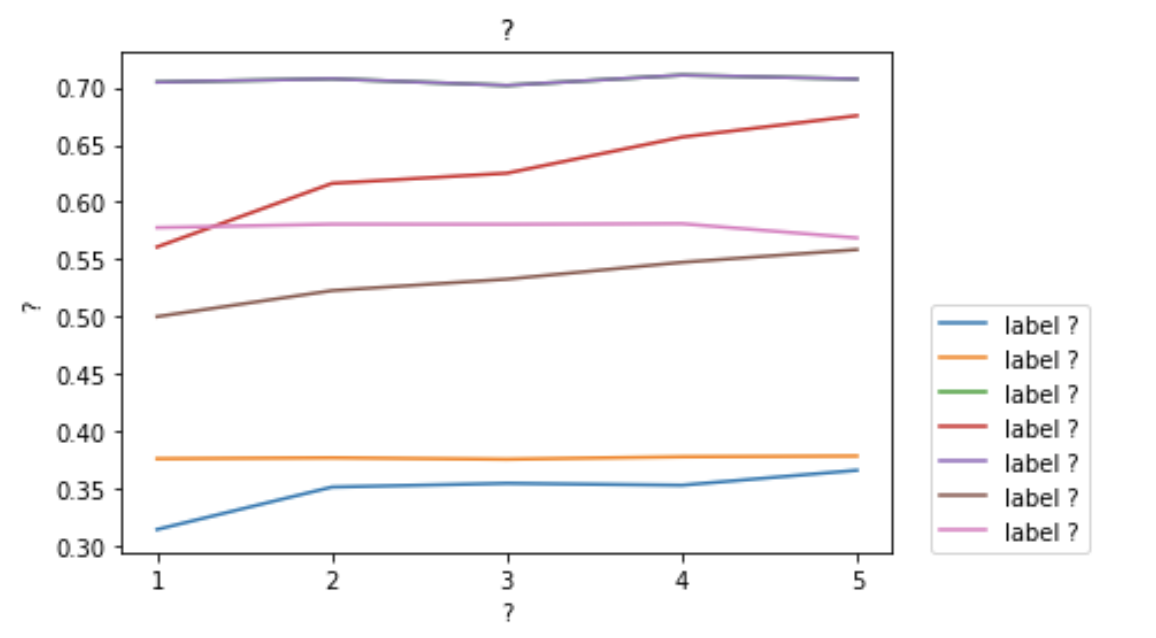

I do not have any legends, labels, title, and etc in my plot, you should include informative legends, labels, title, and etc. You can also add other features (e.g. markers) to create nice plot. You are welcome to use either matplotlib or seaborn to draw your plot.


**Important remark: It takes me 14 minutes to train 6 models. If your training time is longer than you expect, please try to use simple CNN models.** 



3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.2465 - loss: 2.0125 - val_accuracy: 0.3407 - val_loss: 1.8176
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3269 - loss: 1.8248 - val_accuracy: 0.3631 - val_loss: 1.7768
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3493 - loss: 1.7855 - val_accuracy: 0.3539 - val_loss: 1.7763
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3601 - loss: 1.7677 - val_accuracy: 0.3765 - val_loss: 1.7292
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3701 - loss: 1.7392 - val_accuracy: 0.3796 - val_loss: 1.7215
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3815 - loss: 1.7055 - val_accuracy: 0.3847 - val_loss: 1.7086
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3805 - loss: 1.7030 - val_accuracy: 0.3792 - val_loss: 1.7099
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3882 - loss: 1.6882 - val_accuracy: 0.3828 - val_loss: 1.7096
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0

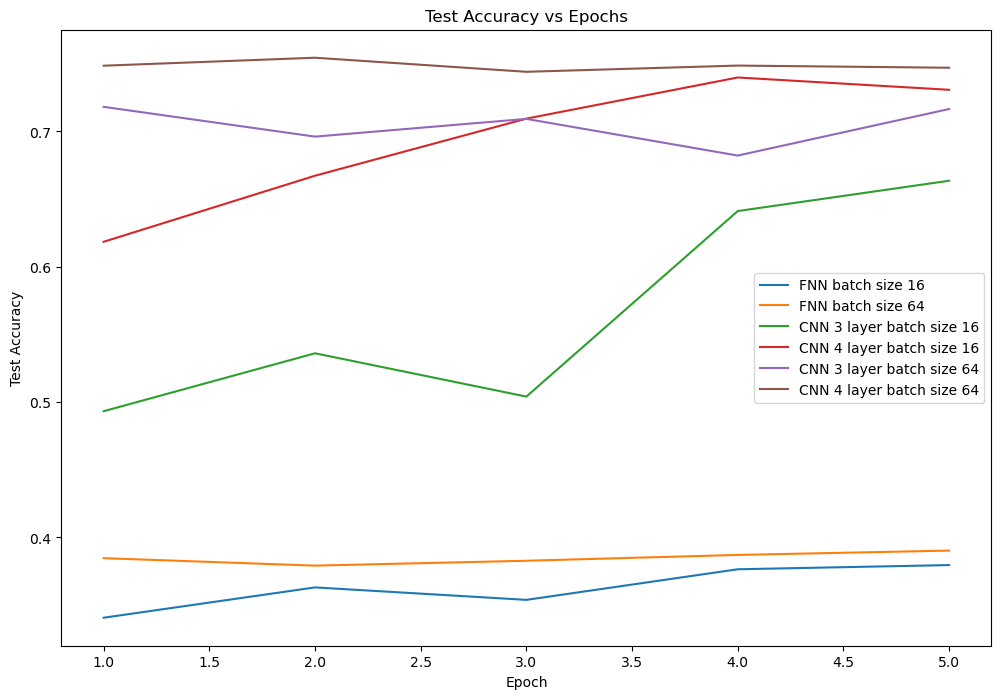

In [11]:
batch_sizes = [16, 64]
results = {}

# Preprocess the data for the FNN model by converting shape from 3D/4D to 2D
train_images_fnn = FNNprep(train_images)
test_images_fnn = FNNprep(test_images)

# FNN Model with different batch sizes
for batch_size in batch_sizes:
    results[f'FNN batch size {batch_size}'] = trainModel(model, train_images_fnn, train_labels, test_images_fnn, test_labels, batch_size)
    
# CNN Model with different batch sizes
for batch_size in batch_sizes:
    results[f'CNN 3 layer batch size {batch_size}'] = trainModel(model2, train_images, train_labels, test_images, test_labels, batch_size)
    results[f'CNN 4 layer batch size {batch_size}'] = trainModel(model3, train_images, train_labels, test_images, test_labels, batch_size)

# Plot
plt.figure(figsize=(12, 8))
for label, accuracies in results.items():
    plt.plot(range(1, 6), accuracies, label=label)

plt.title('Test Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.legend()
plt.show()

## Repeate your experiments:

Since there is randomness in your experiment such as the random initialization of your parameters (`he_normal`) and random shuffle of your dataset (`model.fit`), we usually repeat previous experiments many times and compute the mean to alleviate the randomness. We can also compute the standard deviation to measure the variation. We expect small standard deviation and it means that randomness in your experiment does not change your test accuracy too much.

You may notice that training CNN is time consuming. To save your time, we will do this part only for FNN. 

Please repeat your previous experiments 5 times for your FNN model. Specifically, you should repeat the following process 5 times: create your FNN model, select batch_size = 16/64, train your model and record test accuracy. 

Then, compute average test accuracy (1 decimal place) and standard deviation (1 decimal places) after each epoch and fill in the following table. 

In ths following table, 67.1% is the average test accuracy, 5.1% is the standard deviation. You should replace them using the data you compute. I only use those numbers to generate this template, and they do not have any real meaning.

|                      |   Epoch 1    |   Epoch 2    |   Epoch 3    |   Epoch 4    |   Epoch 5    |
|:--------------------:|:------------:|:------------:|:------------:|:------------:|:------------:|
|    batch_size = 16   |35.2%$\pm$1.9%|36.6%$\pm$2.4%|38.2%$\pm$2.0%|38.6%$\pm$2.5%|39.2%$\pm$2.0%|
|    batch_size = 64   |40.6%$\pm$2.5%|40.9%$\pm$2.5%|40.7%$\pm$2.4%|40.8%$\pm$3.1%|41.3%$\pm$2.7%|


In [12]:
# Initialize lists to store test accuracies for each epoch
accuracies_bs16 = []
accuracies_bs64 = []

# Repeat the experiments 5 times
for i in range(5):
    # Create FNN model
    model = tf.keras.models.Sequential([
        layers.Dense(50, input_shape=(32 * 32 * 3,), activation='relu', kernel_initializer='he_normal'),
        layers.Dense(50, activation='relu'),
        layers.Dense(50, activation='relu'),
        layers.Dense(10)
    ])
    
    # Preprocess the data for the FNN model
    train_images_fnn = FNNprep(train_images)
    test_images_fnn = FNNprep(test_images)
    
    # Train the model and record test accuracy for each epoch
    accuracy_bs16 = trainModel(model, train_images_fnn, train_labels, test_images_fnn, test_labels, batch_size=16)
    accuracy_bs64 = trainModel(model, train_images_fnn, train_labels, test_images_fnn, test_labels, batch_size=64)
    
    # Store test accuracies for each epoch
    accuracies_bs16.append(accuracy_bs16)
    accuracies_bs64.append(accuracy_bs64)

# Compute average and standard deviation of test accuracies for each epoch
mean_bs16 = np.mean(accuracies_bs16, axis=0)
std_bs16 = np.std(accuracies_bs16, axis=0)

mean_bs64 = np.mean(accuracies_bs64, axis=0)
std_bs64 = np.std(accuracies_bs64, axis=0)

# Print the results
print("Epoch\tBatch Size 16\tBatch Size 64")
for epoch in range(len(mean_bs16)):
    print(f"{epoch+1}\t{mean_bs16[epoch]*100:.1f}% ± {std_bs16[epoch]*100:.1f}%\t\t"
          f"{mean_bs64[epoch]*100:.1f}% ± {std_bs64[epoch]*100:.1f}%")

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.2669 - loss: 1.9948 - val_accuracy: 0.3844 - val_loss: 1.7267
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3741 - loss: 1.7377 - val_accuracy: 0.4069 - val_loss: 1.6742
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4035 - loss: 1.6682 - val_accuracy: 0.4112 - val_loss: 1.6404
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4165 - loss: 1.6236 - val_accuracy: 0.4218 - val_loss: 1.6164
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.4206 - loss: 1.6063 - val_accuracy: 0.4203 - val_loss: 1.6161
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4481 - loss: 1.5378 - val_accuracy: 0.4409 - val_loss: 1.5576
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4522 - loss: 1.5166 - val_accuracy: 0.4488 - val_loss: 1.5530
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4598 - loss: 1.5122 - val_accuracy: 0.4412 - val_loss: 1.5598
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0

## Conclusion:

Please list at least 3 informative conclusions based on your numerical results

1. FNN has a much lower test accuracy than CNN. This implies that CNN is preferred for image classification tasks compared to FNN. 
2. There is not a significant difference in test accuracy when using 3 CNN layers versus 4. 
3. There is a more significant difference in test accuracy when using a larger batch size for CNN models compared to FNN models, which don't show as much of an increase in accuracy when using a batch size of 64 compared to 16. 